In [1]:
import torch.nn as nn # importing torch.nn as nn

In [2]:
!pip install torch torchvision #installing torchvision package

In [3]:
import torch # importing torch
from torchvision import datasets # importing datasets from torchvision
from torchvision.transforms import ToTensor, Lambda #importing ToTensor and Lambda
from torch.utils.data import Dataset, random_split

In [4]:
import pandas as pd

In [5]:
training_data = pd.read_csv("/content/drive/MyDrive/Kannada MNIST/train.csv")
testing_data = pd.read_csv("/content/drive/MyDrive/Kannada MNIST/test.csv")

In [7]:
training_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
testing_data

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,4996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,4997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,4998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Custom Dataset

In [15]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomDataset(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.img_labels = df.iloc[:, 0]
        self.data = df.iloc[:, 1:]
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = torch.tensor(self.data.iloc[idx,:])
        label = self.img_labels.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

These are the image datasets

In [16]:
train_images = CustomDataset(training_data)
test_images = CustomDataset(testing_data)


In [19]:
from torch.utils.data import random_split
train_size = int(0.8 * len(train_images))
valid_size = len(train_images) - train_size

train_dataset, val_dataset = random_split(train_images, [train_size, valid_size])

In [22]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=64, shuffle=True)

# Image

In [34]:
train_features,train_labels = next(iter(train_dataloader))

In [36]:
import matplotlib.pyplot as plt

Feature batch shape: torch.Size([64, 784])
Labels batch shape: torch.Size([64])


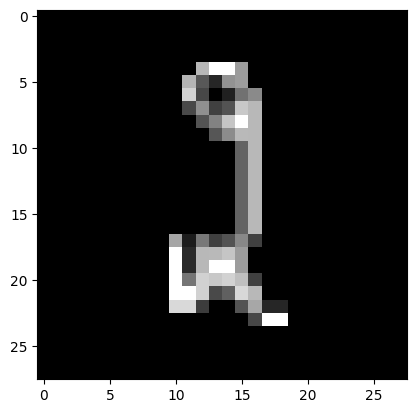

Label: 3


In [37]:
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].reshape(28,28).squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


# So we have the train, valid and test dataloaders

In [23]:
# Define a simple neural network architecture
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.linear1 = nn.Linear(in_features=28*28, out_features=128)  # Input size 784 (28x28), output size 128
        self.linear2 = nn.Linear(in_features=128, out_features=64)   # Input size 128, output size 64
        self.linear3 = nn.Linear(in_features=64, out_features=10)    # Input size 64, output size 10 for 10 classes

    def forward(self, x): # forward prop function
        x = x.float()
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.softmax(self.linear3(x),dim = 1)
        return x

# Create an instance of the SimpleNet
simple_net = SimpleNet()

# Now we will train it , validate it , test it

## Choosing the loss function and optimizer

In [24]:
import torch.optim as optim #importing optim

In [25]:
criterion = nn.CrossEntropyLoss()  # Taking Cross Entropy Loss as the Loss function
optimizer = optim.Adam(simple_net.parameters(), lr=1e-4)  # optimizer is ADAM

# Creating DataLoaders
Here Data Loaders are iteratable dataobject , where iterating over the batches and the data is fed into the model for processing.

# Training and Validating the Model

In [26]:
import numpy as np

In [27]:
def trainval_loop(train_loader, val_loader, simple_net, criterion, optimizer): #parameters for the function
    # Set the model to training mode before entering loops
    simple_net.train()

    # Training loop
    size = len(train_loader.dataset)
    for batch, (X, y) in enumerate(train_loader):
        # Compute prediction and loss (training)
        pred = simple_net(X)
        loss = criterion(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() # this is done to deny the involement of the previous gradients interference with the current ones

        if batch % 100 == 0:
            current = batch * len(X)
            print(f"Training loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]") #printing training loss

    # Set the model to evaluation mode before validation
    simple_net.eval()

    # Validation loop
    val_loss = 0
    val_size = len(val_loader.dataset)
    with torch.no_grad():  # No need to compute gradients during validation
        for batch, (X, y) in enumerate(val_loader):
            # Compute prediction and loss
            pred = simple_net(X)
            loss = criterion(pred, y)
            val_loss += loss.item()

            if batch % 100 == 0:
                current = batch * len(X)
                print(f"Validation loss: {loss.item():>7f}  [{current:>5d}/{val_size:>5d}]") #printing validation loss

    avg_val_loss = val_loss / len(val_loader)
    print(f"Avg. Validation loss: {avg_val_loss:>7f}") #printing average validation loss



# Testing the Model

In [32]:
# this chunk is important for testing the model
def test_loop(test_loader, simple_net, criterion): # function test_loop taking these respective parameters
    simple_net.eval() # setting the model to eval
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            pred = simple_net(X)
            test_loss += criterion(pred, y).item()

            # Calculate the number of correct predictions in this batch
            pred_labels = pred.argmax(dim=1)
            #y= y.argmax(dim=1)
            #print(pred_labels,y)
            correct += (pred_labels == y).sum().item()

    test_loss /= num_batches
    accuracy = correct / size
    print(f"Test Error: \n Accuracy: {(100*accuracy):.2f}%, Avg loss: {test_loss:.8f} \n") # printint the Accuracy (TEST) and the test_loss





# Now Training and Validation


In [29]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainval_loop(train_dataloader,val_dataloader, simple_net, criterion, optimizer) # running train_val loop by 10 times
print("Done!")

Epoch 1
-------------------------------
Training loss: 2.363899  [    0/48000]
Training loss: 1.738260  [ 6400/48000]
Training loss: 1.720849  [12800/48000]
Training loss: 1.591219  [19200/48000]
Training loss: 1.541154  [25600/48000]
Training loss: 1.638258  [32000/48000]
Training loss: 1.497623  [38400/48000]
Training loss: 1.670950  [44800/48000]
Validation loss: 1.569715  [    0/12000]
Validation loss: 1.593749  [ 6400/12000]
Avg. Validation loss: 1.598214
Epoch 2
-------------------------------
Training loss: 1.533833  [    0/48000]
Training loss: 1.715802  [ 6400/48000]
Training loss: 1.595693  [12800/48000]
Training loss: 1.599838  [19200/48000]
Training loss: 1.549958  [25600/48000]
Training loss: 1.712689  [32000/48000]
Training loss: 1.582615  [38400/48000]
Training loss: 1.569098  [44800/48000]
Validation loss: 1.602625  [    0/12000]
Validation loss: 1.588855  [ 6400/12000]
Avg. Validation loss: 1.587913
Epoch 3
-------------------------------
Training loss: 1.584211  [    

# Testing

In [33]:
test_loop(val_dataloader, simple_net, criterion) #test_loop running and checking the results

Test Error: 
 Accuracy: 97.94%, Avg loss: 1.48163900 

